In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring = None, 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")


In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [5]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
all_data.shape

(2919, 288)

In [42]:
train_X = all_data[:train.shape[0]]
test_X = all_data[train.shape[0]:]
train_y = np.log(train.SalePrice)


In [43]:
from sklearn.model_selection import train_test_split

num_test = 0.20
X_train, X_cv, y_train, y_cv = train_test_split(train_X, train_y, test_size=num_test, random_state=23)

# RidgeCV

In [44]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
mse_scorer = make_scorer(mean_squared_error)

In [45]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {"alpha": np.logspace(-3, 1, 5)}
grid_search = GridSearchCV(ridge, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
ridge = grid_search.best_estimator_
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
import math
y_pred = ridge.predict(X_cv)
print("Ridge rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Ridge mae: %.3f" % math.sqrt(mean_absolute_error(y_cv, y_pred)))

Ridge rmse: 0.138
Ridge mae: 0.304


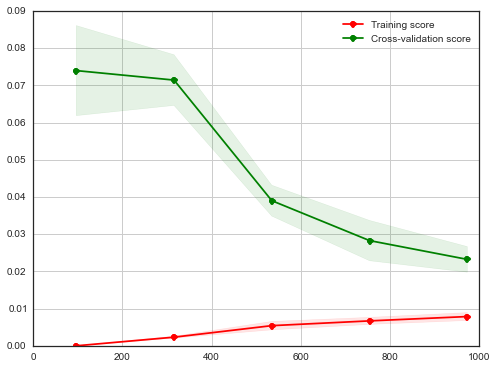

In [78]:
plot_learning_curve(ridge, "Ridge", train_X, train_y, scoring = mse_scorer)

# LassoCV

In [95]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {"alpha": np.logspace(-2, 2, 5)}
grid_search = GridSearchCV(lasso, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
lasso = grid_search.best_estimator_
lasso.fit(X_train, y_train)

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
import math
y_pred = lasso.predict(X_cv)
print("Lasso rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Lasso mae: %.3f" % math.sqrt(mean_absolute_error(y_cv, y_pred)))

Lasso rmse: 0.342
Lasso mae: 0.516


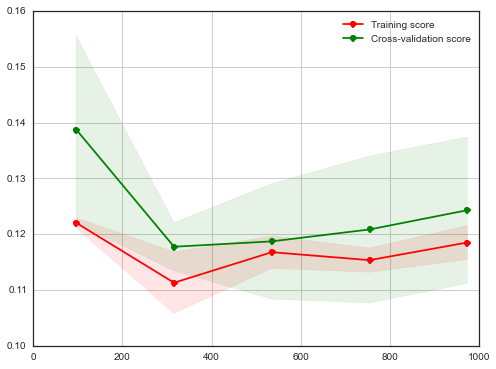

In [97]:
plot_learning_curve(lasso, "Lasso", train_X, train_y, scoring = mse_scorer)

## Linear regression 

In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
import math
y_pred = lr.predict(X_cv)
print("Linear Regression rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Linear regressions mae: %.3f" % mean_absolute_error(y_cv, y_pred))

Linear Regression rmse: 0.138
Linear regressions mae: 0.092


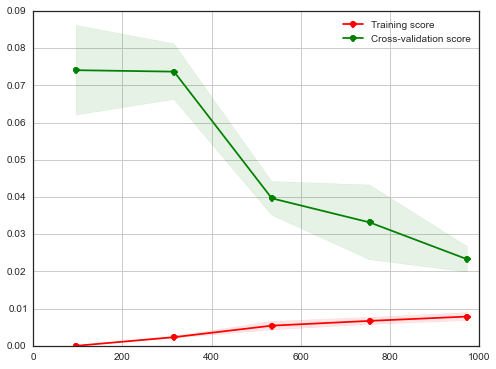

In [100]:
plot_learning_curve(lr, "Linear regression", train_X, train_y, scoring = mse_scorer)

## ElasticNet

In [101]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {"l1_ratio": [1],
              "alpha": np.logspace(-3, 5, 9)}

ee = ElasticNet()
grid_search = GridSearchCV(ee, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
ee = grid_search.best_estimator_
ee.fit(X_train, y_train)

ElasticNet(alpha=10000.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
import math
y_pred = ee.predict(X_cv)
print("Elastic Net rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Elastic Net mae: %.3f" % mean_absolute_error(y_cv, y_pred))

Elastic Net rmse: 0.394
Elastic Net mae: 0.311


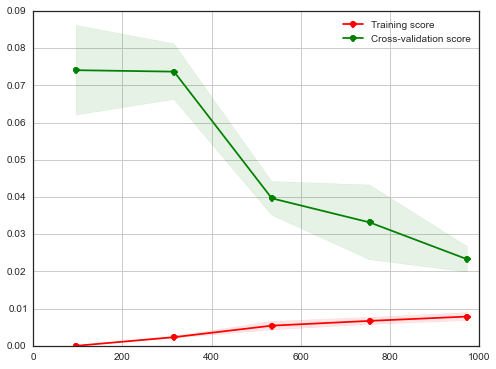

In [103]:
plot_learning_curve(lr, "Linear regression", train_X, train_y, scoring = mse_scorer)

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

grid_search = GridSearchCV(rf, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=8,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [105]:
import math
y_pred = rf.predict(X_cv)
print("Random Forest rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Random Forest mae: %.3f" % mean_absolute_error(y_cv, y_pred))

Random Forest rmse: 0.281
Random Forest mae: 0.212


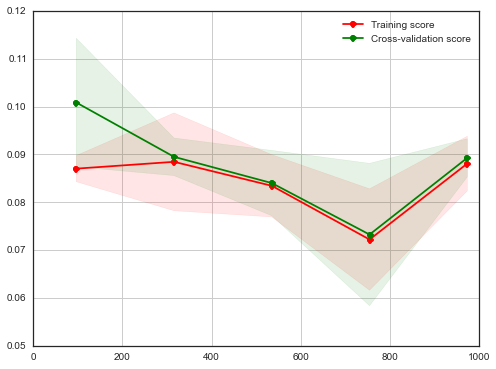

In [106]:
plot_learning_curve(rf, "Random Forest", train_X, train_y, scoring = mse_scorer)

## AdaBoosting 

In [107]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

parameters = {'n_estimators': [4, 6, 9], 
              'learning_rate': np.logspace(-2,0,6)
             }

grid_search = GridSearchCV(ada, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
ada = grid_search.best_estimator_
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.063095734448019331,
         loss='linear', n_estimators=4, random_state=None)

In [108]:
import math
from sklearn.model_selection import cross_val_score

y_pred = ada.predict(X_cv)
print("Adaboost rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("Adaboost mae: %.3f" % mean_absolute_error(y_cv, y_pred))


Adaboost rmse: 0.208
Adaboost mae: 0.155


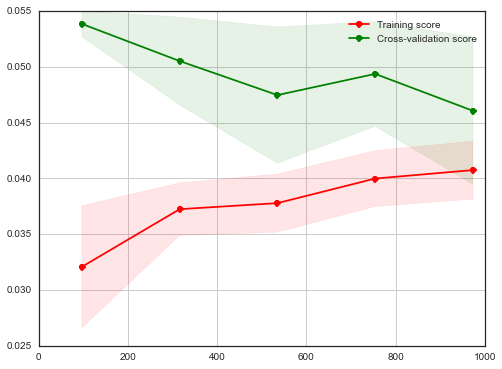

In [109]:
plot_learning_curve(ada, "AdaBoosting", train_X, train_y, scoring = mse_scorer)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

grid_search = GridSearchCV(gbr, parameters, scoring=mse_scorer)
grid_search = grid_search.fit(X_train, y_train)
gbr = grid_search.best_estimator_
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=8,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=4, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [111]:
import math
y_pred = gbr.predict(X_cv)
print("GradientBoostingRegressor rmse: %.3f" % math.sqrt(mean_squared_error(y_cv, y_pred)))
print("GradientBoostingRegressor mae: %.3f" % mean_absolute_error(y_cv, y_pred))

GradientBoostingRegressor rmse: 0.351
GradientBoostingRegressor mae: 0.272


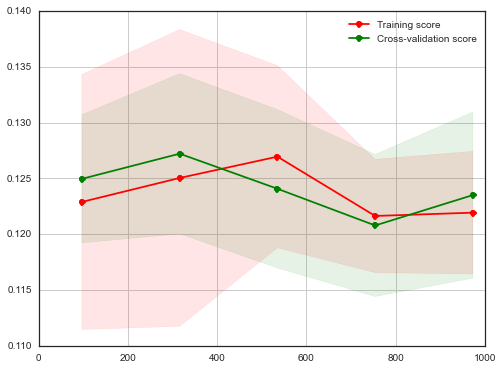

In [112]:
plot_learning_curve(gbr, "GradientBoostingRegressor", train_X, train_y, scoring = mse_scorer)